# Novel vs. repeated choice project: Understanding experimental stimul are created

In [1]:
library(tidyverse)
library(janitor)
library(here)
library(magick)
library(grid)
library(gridExtra)
theme_set(theme_bw())
helpers_path = paste0(here(),'/analysis/helpers/')
source(paste0(helpers_path, '01_clean_behavioral_data.R'))
source(paste0(helpers_path, '03_stim_img_helpers.R'))
fig_out_path = paste0(here(), '/outputs/fig/')

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'janitor'


The following objects are masked from 'package:stats':

    chisq.test, fisher.test


here() starts at /Users/zenkavi/Documents/RangelLab/NovelVsRepeated/behavior

Linking to ImageMagick 6.9.12.93
Enabled features: cairo, fontconfig, freetype, heic, lcms, pango, raw, rsvg, webp
Disabled features: fftw, ghostscript, x11


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




[1] "Done loading data."
[1] "Resetting helpers path..."


Save some images of sample stimuli

In [ ]:
tmp = make_stim_img(shape = 3, orientation = 0, filling = -0.6)

image_write(tmp, path = paste0(fig_out_path, 'sample_stim1.png'), format = 'png')

tmp = make_stim_img(shape = 2, orientation = 120, filling = 0.4)

image_write(tmp, path = paste0(fig_out_path, 'sample_stim2.png'), format = 'png')

# Filling values

Matlab code from `task_YN.m` that determines the filling value for each stimulus

```
bothCol = [0.1 0.1 0.4 -99;
0.4 0.1 0.1 -99]; 

if  mydata.filling(indextrial)>=0
colorStim = bothCol(1,:);
switch  abs(mydata.filling(indextrial))
case 0.4
colorStim(3)= 0.6;
case 0.6
colorStim(3)= 0.5;
case 0.85
colorStim(3)= 0.3;
end   
else
colorStim = bothCol(2,:);
switch  abs(mydata.filling(indextrial))
case 0.4
colorStim(1)= 0.6;
case 0.6
colorStim(1)= 0.5;
case 0.85
colorStim(1)= 0.3;
end
end
colorStim(4)=abs(mydata.filling(indextrial));
```

What are the HEX codes for the filling values in the data?

In [2]:
dat = data.frame(filling = unique(data_yn_clean$filling))

for(i in 1:nrow(dat)){
  dat$hex_code[i] = convertFVToHEX(dat$filling[i])
}

dat = dat %>%
  arrange(filling)

dat

filling,hex_code
<dbl>,<chr>
-0.85,#4D1A1AD9
-0.60,#801A1A99
-0.40,#991A1A66
-0.20,#661A1A33
0.00,#1A1A6600
0.20,#1A1A6633
0.40,#1A1A9966
0.60,#1A1A8099
0.85,#1A1A4DD9


View the filling colors for the stimuli

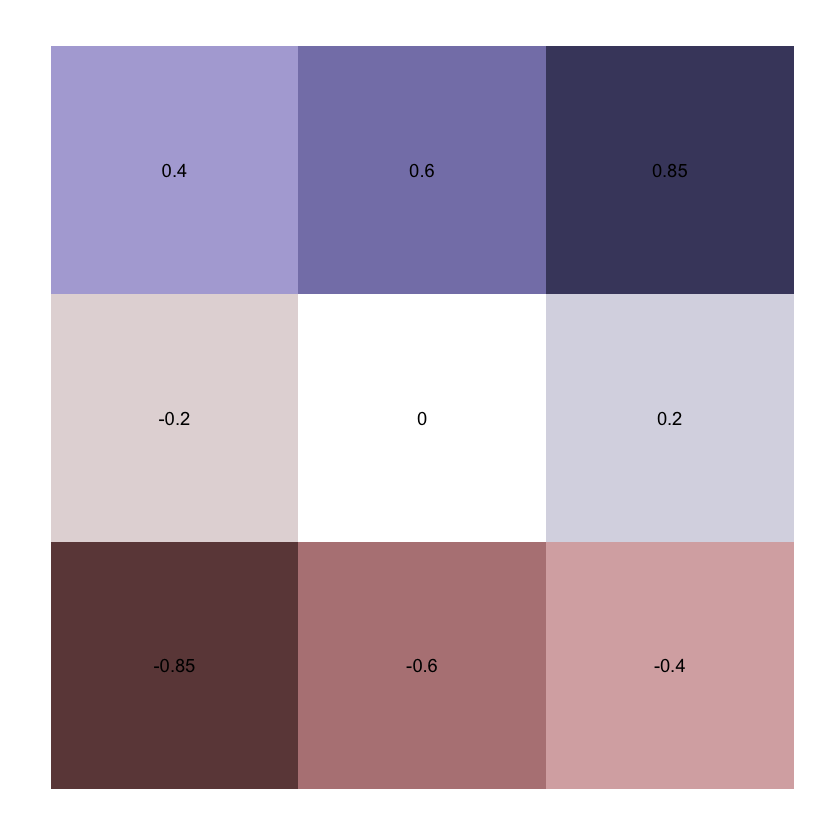

In [3]:
ggplot()+
  annotate("rect", xmin=c(1,2,3,1,2,3,1,2,3), xmax=c(2,3,4,2,3,4,2,3,4), ymin=c(1,1,1,2,2,2,3,3,3) , ymax=c(2,2,2,3,3,3,4,4,4), fill=c(dat$hex_code))+
  annotate("text", x=c(1,2,3,1,2,3,1,2,3)+.5, y=c(1,1,1,2,2,2,3,3,3)+.5 , label=c(dat$filling))+
  theme(axis.ticks = element_blank(),
        axis.text = element_blank(),
        panel.grid = element_blank(),
        axis.title = element_blank(),
        panel.border = element_blank())

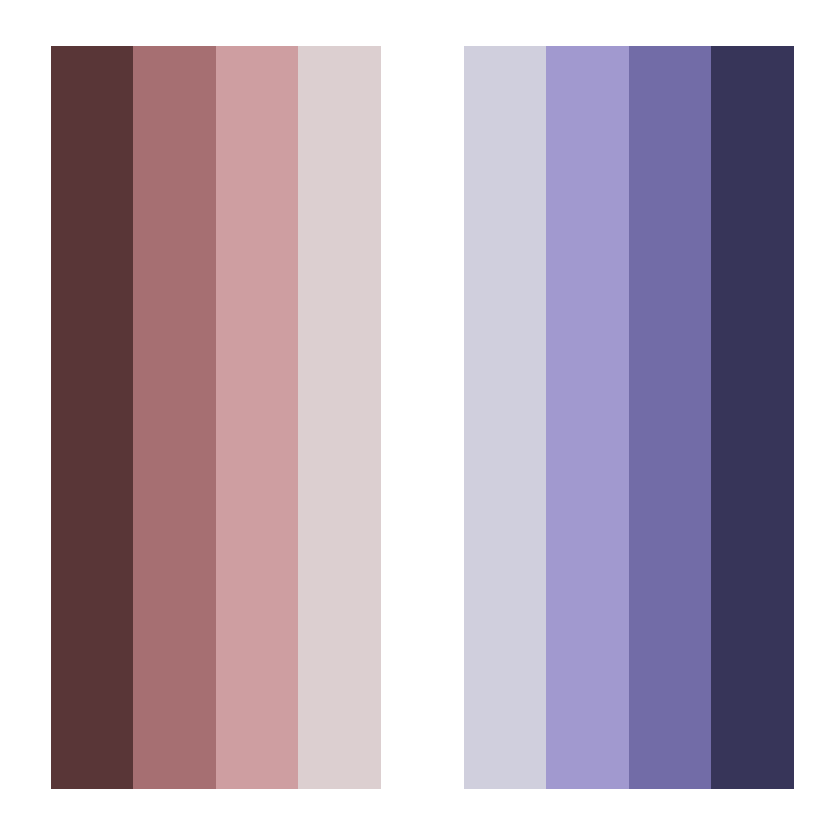

In [6]:
ggplot()+
  annotate("rect", xmin=c(1,2,3,4,5,6,7,8,9), xmax=c(2,3,4,5,6,7,8,9,10), ymin=c(1,1,1,1,1,1,1,1,1) , ymax=c(2,2,2,2,2,2,2,2,2), fill=c(dat$hex_code))+
  theme(axis.ticks = element_blank(),
        axis.text = element_blank(),
        panel.grid = element_blank(),
        axis.title = element_blank(),
        panel.border = element_blank())

ggsave(paste0(fig_out_path, 'filling_levels.png'), width = 9, height = 1)

BUT THIS WOULD MEAN THERE ARE ONLY 9 INSTEAD OF 11 VALUES WHICH WOULD REPEAT FILLING VALUES!  
So there would be two same stimuli with different payoffs.

In `createStimuli.m` there is also this conversion of the third column of `all` which contains the filling levels.

It converts the filling levels that are assigned to filling values to different levels. Instead of the levels above there are two other levels in this set of numbers.

```
all(all(:,3)==0.2,3)= 0.05;
all(all(:,3)==0.4,3)= 0.17;
all(all(:,3)==0.6,3)= 0.4;
all(all(:,3)==0.8,3)= 0.6;
all(all(:,3)==1,3)= 0.85;
all(all(:,3)==-0.2,3)= -0.05;
all(all(:,3)==-0.4,3)= -0.17;
all(all(:,3)==-0.6,3)= -0.4;
all(all(:,3)==-0.8,3)= -0.6;
all(all(:,3)==-1,3)= -0.85;
```

What do these look like

In [ ]:
dat = data.frame(filling = c(.05, .17, .4, .6, .85, 0, -.05, -.17, -.4, -.6, -.85, NA))

for(i in 1:nrow(dat)){
  dat$hex_code[i] = convertFVToHEX(dat$filling[i])
}

dat = dat %>%
  arrange(filling)

dat

In [ ]:
ggplot()+
  annotate("rect", xmin=c(1,2,3,4,1,2,3,4,1,2,3,4), xmax=c(2,3,4,5,2,3,4,5,2,3,4,5), ymin=c(1,1,1,1,2,2,2,2,3,3,3,3) , ymax=c(2,2,2,2,3,3,3,3,4,4,4,4), fill=c(dat$hex_code))+
  annotate("text", x=c(1,2,3,4,1,2,3,4,1,2,3,4)+.5, y=c(1,1,1,1,2,2,2,2,3,3,3,3)+.5 , label=c(dat$filling))+
  theme(axis.ticks = element_blank(),
        axis.text = element_blank(),
        panel.grid = element_blank(),
        axis.title = element_blank(),
        panel.border = element_blank())

**why are they different than the ones in the behavioral data filling column**

`data_choiceYN.csv` is a merge of all `taskYN_subj*_day*_session4.mat` created by `createDataYN.m`. Each of these `.mat` files involve a struct called `mydata`. The `filling` attribute in these structs has the 9 (not 11!) values in we have in the `data_choiceYN.csv`.

Where are these assigned in the `mydata` struct?

`mydata` is both the input and the output of the `taskYN.m` function.

In `taskYN.m` when `showStimulusOnScreen` is called the input specifying filling is not from `mydata` but from `colorStim` which is the converted value of `mydata.filling`.

The `mydata.filling` values are specified in `createStimuli.m` so the lines above converting `all(:3)` should have changed these. 

**BUT due to rounding error this didn't work as intended! So in the stimuli there were indeed 9 filling values instead of 11** ![Here's the problem:](../outputs/fig/MatlabMadness.png))

# Stim outcomes

The stimuli are not gambles. If they are chosen to be played they always yield the same reward. If they are not chosen then they yield the reference amount.

In [ ]:
tmp = data_yn_clean %>%
  filter(yesChosen == 1) %>%
  select(possiblePayoff, payoff)

sum(tmp$possiblePayoff == tmp$payoff) == nrow(tmp)

*BUT* the payoff for each stimulus is sampled from a distribution

In [ ]:
data_yn_clean %>%
  filter(subnum == "601") %>%
  filter(stimNum == 85) %>%
  tabyl(possiblePayoff)

# Number of stims/session

How many HT and RE trials in each session?

In [ ]:
with(data_yn_clean, table(type, day, subnum))

How many HT and RE trials in each imaging session?

In [ ]:
with(data_bc_clean, table(typeLeft, day, fmri, subnum))

# Attribute values

3 features: 
Shape 6
Orientation 11
Filling 11

Does the orientation and filling have the same value for each shape? Yes.

In [ ]:
dat = data_yn_clean %>%
  filter(subnum == 601) %>%
  select(subnum, day, stimNum, type, orientation, filling, shape, valueO, valueF, valueS, possiblePayoff)

In [ ]:
with(dat, table(orientation, valueO, shape))

In [ ]:
with(dat, table(filling, valueF, shape))

How are the payoffs for each stimulus computed? From matlab code:

```
% all(:,4) <- shape value
% all(:,5) <- orientation value
% all(:,6) <- filling color value

round(((all(:,4) + all(:,5) + all(:,6))/2)*100)
```

In [ ]:
dat %>%
  select(orientation, filling, shape, valueO, valueF, valueS, possiblePayoff) %>%
  mutate(guess = round(100 * ((valueS + valueO + valueF)/2) ))

# Save stims for all subjects

Makes and save all stim images for all subjects

In [ ]:

# 726*6 = 4356 rows

stim_info = data_yn_clean %>%
  select(subnum, stimNum, orientation, filling, shape, type) %>%
  group_by(subnum, stimNum) %>%
  distinct()

# for(i in 1:10){ #test before running it for all stims
for(i in 1:nrow(stim_info)){
  cur_sub = stim_info$subnum[i]
  cur_type = stim_info$type[i]
  cur_stimNum = stim_info$stimNum[i]
  
  cur_shape = stim_info$shape[i]
  cur_orient = stim_info$orientation[i]
  cur_filling = stim_info$filling[i]
  
  if(cur_type == 1 | cur_type == "HT"){
    cur_stimNum = paste0(cur_stimNum, '_ht')
  }
  
  img_fn = paste0(fig_out_path, 'stims/sub-', cur_sub, '/', cur_stimNum, '.png')
  
  if(!file.exists(img_fn)){
    tmp = make_stim_img(shape = cur_shape, orientation = cur_orient, filling = cur_filling)
    
    image_write(tmp, path = img_fn, format = 'png')
    
    dev.off()
  }
  
}





# Stim and payoff report for each subject


In [ ]:
cur_sub = 601

img_path = paste0(fig_out_path, 'stims/sub-', cur_sub, '/')

img_fns = list.files(img_path)
img_fns = gtools::mixedsort(img_fns)

img_fns = img_fns[1:20]

rl = lapply(paste0(img_path, img_fns), img_read_border_annotate)

ml <- marrangeGrob(rl, nrow=11, ncol=11)

# ml

ggsave(paste0(fig_out_path, "tmp.pdf"), ml)
# ggsave(paste0(fig_out_path, "sub-",cur_sub, "_stims.pdf"), ml)

Order stims by 
shape in pages
filling in columns
orientation in rows

In [ ]:
subnums = sort(unique(data_yn_clean$subnum))

shape_vals = sort(unique(data_yn_clean$shape))
orient_vals = sort(unique(data_yn_clean$orient))

blank <- grid::rectGrob(gp=grid::gpar(fill="white", color=NA))
repList = list("-0.85" = 1, "-0.6" = 2, "-0.4" = 4, "-0.2" = 5, "0" = 6, "0.2" = 7, "0.4" = 9, "0.6" = 10, "0.85" = 11)


for(cur_sub in subnums){
  
  fn = paste0(fig_out_path, "sub-",cur_sub, "_stims.pdf")
  
  if(!file.exists(fn)){
    print(paste0("Starting sub-", cur_sub))
    
    img_path = paste0(fig_out_path, 'stims/sub-', cur_sub, '/')
    
    sl = list()
    pl = list()
    
    # Make first info page with payoff info
    tmp = data_yn_clean %>%
      filter(subnum == cur_sub)
    
    t1 = tableGrob(with(tmp, table(valueO, orientation)))
    t2 = tableGrob(with(tmp, table(valueF, filling)))
    t3 = tableGrob(with(tmp, table(valueS, shape)))
    
    stimsOrder = data_yn_clean %>%
      filter((subnum == cur_sub) & (type == 1)) %>%
      select(subnum, stimNum, orientation, filling, shape, type, valueO, valueF, valueS) %>%
      distinct() %>%
      mutate(stimNum = ifelse(type == 1, paste0(stimNum, "_ht.png"), paste0(stimNum, ".png")))
    
    stimsOrder = stimsOrder$stimNum
    
    rl = lapply(paste0(img_path, stimsOrder), img_read_border_annotate)
    
    ht_stims = arrangeGrob(grobs = rl, nrow=3, ncol=4)
    
    info_page = arrangeGrob(grobs = list(t1, t2, ht_stims, t3), nrow = 2, ncols = 2, widths = c(5, 5), heights = c(3.5, 3.5))
    
    # Add first page of reward info and HT stims
    pl[[1]] = info_page
    
    for(i in 1:length(shape_vals)){
      cur_shape = shape_vals[i]
      
      for(j in 1:length(orient_vals)){
        cur_orient = orient_vals[j]
        
        stimsOrder = data_yn_clean %>%
          filter((subnum == cur_sub) & (shape == cur_shape) & (orientation == cur_orient)) %>%
          select(subnum, stimNum, orientation, filling, shape, type, valueO, valueF, valueS) %>%
          distinct() %>%
          arrange(filling) %>%
          mutate(stimNum = ifelse(type == 1, paste0(stimNum, "_ht.png"), paste0(stimNum, ".png")))
        
        fillTable = table(stimsOrder$filling)
        
        stimsOrder = stimsOrder$stimNum
        
        rl = lapply(paste0(img_path, stimsOrder), img_read_border_annotate)
        
        if (length(rl) != 11){
          if(length(names(fillTable)) == 8){ #if there is no stim for a filling level
            repSlot = repList[!names(repList) %in% names(fillTable)][[1]] - 1
          } else{ #if there is one fewer stims for .4 or -0.4 filling levels
            repSlot = repList[names(which(fillTable != c(1,1,2,1,1,1,2,1,1)))][[1]] - 1
          }
          rl = append(rl, list(blank), repSlot)
        }
        
        #One column of shape and orientation for 11 filling levels
        sl[[j]] = arrangeGrob(grobs = rl, nrow=11, ncol=1)
      }
      
      # 11 columns for one shape and all levels of orientation and filling
      pl[[i+1]] = arrangeGrob(grobs = sl, nrow = 1, ncol = 11)
    }
    
    # Arrange each shape on separate page
    ml <- marrangeGrob(grobs = pl, nrow=1, ncol=1)
    
    ggsave(paste0(fig_out_path, "sub-",cur_sub, "_stims.pdf"), ml, width = 11, height = 8)
    print(paste0("Done saving sub-", cur_sub))
  }
  
  
}

rm(img_path, sl, pl, tmp, t1, t2, t3, stimsOrder, rl, ht_stims, info_page, cur_shape, cur_orient, cur_sub, fillTable, repSlot, ml, subnums, shape_vals, orient_vals, blank, repList)

Because one filling value has two values there are two stimuli with different mean values 

In [ ]:
tmp = data_yn_clean %>%
  filter(subnum == cur_sub)

t1 = tableGrob(with(tmp, table(valueO, orientation)))
t2 = tableGrob(with(tmp, table(valueF, filling)))
t3 = tableGrob(with(tmp, table(valueS, shape)))

stimsOrder = data_yn_clean %>%
  filter((subnum == cur_sub) & (type == 1)) %>%
  select(subnum, stimNum, orientation, filling, shape, type, valueO, valueF, valueS) %>%
  distinct() %>%
  mutate(stimNum = ifelse(type == 1, paste0(stimNum, "_ht.png"), paste0(stimNum, ".png")))

stimsOrder = stimsOrder$stimNum

rl = lapply(paste0(img_path, stimsOrder), img_read_border_annotate)

ht_stims = arrangeGrob(grobs = rl, nrow=3, ncol=4)

info_page = arrangeGrob(grobs = list(t1, t2, ht_stims, t3), nrow = 2, ncols = 2, widths = c(5, 5), heights = c(3.5, 3.5))

ggsave(paste0(fig_out_path, "tmp5.pdf"), info_page, width = 11, height = 8)

When the value difference is large RE and HT Rts don't look very different.
Is this because of generalizing a particularly eggregious attribute value?

What does a high value difference RE and HT stimuli look like? What attribute drives their value to the extreme?

Are the RE trials particularly slow for low value difference because ...

When deciding for an HT stim is it more habit-like? Less conscious? More a quick memory retrieval?
